# Assignment 2 ML
   ### Maggie Ezzat Gamil Gaid 37-575 T-1
   ### Mariz Samir Mounir Awad 37-2632  T-7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

**Given an array convert it to binary**

In [2]:
def binarize(arr):
    for i in range(len(arr)):
        if arr[i]>140:
            arr[i]=1
        else:
            arr[i]=0
    return arr

**Reading data & binarizing images:**

In [3]:
train_dir = "./Images/"

#train_data is X
train_data = np.zeros(shape=(1,784)).astype(int)

for i in range(1,2401):
    file_name = train_dir+ str(i)+".jpg"
    img = plt.imread(file_name)
    img = img.flatten()
    img = binarize(img)
    train_data = np.vstack((train_data, img))
    
#remove the first zero row in the matrix initizalization        
train_data = np.delete(train_data, (0), axis=0) 

train_data.shape

(2400, 784)

**Centroids Initialization:**

In [4]:
def initialize(train_data):
    clusters_means = np.zeros(shape=(10,784))
    new_data = train_data

    r = random.randint(0,2400)
    clusters_means[0] = train_data[r]
    new_data = np.delete(new_data, r, 0)

    for mean_index in range(1,10):
        prev_mean = clusters_means[mean_index-1]
        min_dist = math.inf
        for i in range(new_data.shape[0]):
            dist = np.linalg.norm(prev_mean - new_data[i])
            if dist<min_dist:
                min_dist = dist
                new_data = np.delete(new_data, i, 0)
                clusters_means[mean_index] = new_data[i]
                break
    
    return clusters_means
    

**Given the dataset and the means, computes the membership:**

In [5]:
def compute_memberships(data, means):
    
    membership_arr = np.zeros(shape=2400)
    
    for data_index in range(data.shape[0]):
        min_dist = math.inf
        selected_cluster = 0
        for mean_index in range(means.shape[0]):
            dist = np.linalg.norm(means[mean_index] - data[data_index])
            if dist < min_dist:
                min_dist = dist
                selected_cluster = mean_index
        
        membership_arr[data_index] = selected_cluster
        
    return membership_arr

**Given the membership, update the means:**

In [6]:
def update_means(data, membership, means):
    
    updated_means = np.zeros(shape=(10,784))
    for k in range(0,10):
        #get members of this cluster
        members_indices = np.where(membership == k)
        new_mean = np.mean(data[members_indices], axis=0)
        updated_means[k] = new_mean
        
    return updated_means
        

In [7]:
def compare_arr(arr1, arr2):
    if len(arr1) != len(arr2):
        return False
    for i in range(len(arr1)):
        if arr1[i] != arr2[i]:
            return False
    return True

**Given the membership array, the means, and the data, calculate the sum of within cluster distances:**

In [8]:
def calc_within_cluster_dist(mem_arr, train_data, means):
    
    _sum = 0
    
    for c_ID in range(0,10):
        for i in range(len(mem_arr)):
            if mem_arr[i] == c_ID:
                data = train_data[i]
                dist = np.linalg.norm(means[c_ID] - data)
                _sum+=dist
    return _sum
    

**Run the K-NN algorithm 30 times, and store the index of the best initialization:**     
One that produces the least within cluster distances

In [9]:
mem_results = np.zeros(shape=(30,2400))
means_results = np.zeros(shape=(30,10,784))

min_within_cluster_dist = math.inf
best_initialization_index = 0

for i in range(0,30):
    updated_means = initialize(train_data)
    membership_arr = compute_memberships(train_data, updated_means)

    while True :
        prev_membership = membership_arr
        updated_means = update_means(train_data, membership_arr, updated_means)
        membership_arr = compute_memberships(train_data, updated_means)
        if compare_arr(prev_membership, membership_arr):
            break
        dist = calc_within_cluster_dist(membership_arr, train_data, updated_means)
        if dist < min_within_cluster_dist:
            min_within_cluster_dist = dist
            best_initialization_index = i
    mem_results[i] = membership_arr
    means_results[i] = updated_means

**Identify the cluster of th digit, and get the number of instances clustered in this cluster:**

In [10]:
def get_cluster_counts(arr):
    
    counts = [0]*10
    
    for i in range(len(arr)):
        cluster = int(arr[i])
        counts[cluster] = counts[cluster] + 1
    
    cluster = counts.index(max(counts))
    in_cluster_counts = max(counts)
    
    return (cluster, in_cluster_counts)

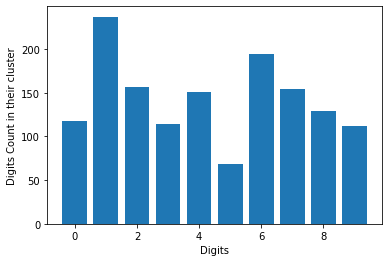

In [11]:
digits_mem = np.array_split(mem_results[best_initialization_index], 10)

digits_counts_in_cluster = []

for i in range(len(digits_mem)):
    arr = digits_mem[i]
    (cluster, in_cluster_counts) = get_cluster_counts(arr)
    digits_counts_in_cluster.append(in_cluster_counts)

digits = [0,1,2,3,4,5,6,7,8,9]


plt.bar(digits,digits_counts_in_cluster)
plt.xlabel('Digits')
plt.ylabel('Digits Count in their cluster')
plt.show()
    